In [1]:
import pandas as pd

In [2]:
%run analysis_utils.py

In [3]:
def get_param_size(model):
    model_params_map={
    'HVG': 0,
    'PCA': 0,
    'scGPT': 53e6, 
    'scGPT [cancer]': 53e6,
    'scVI': 0,
    'GF-V1': 10e6,
    'GF-V2 [cancer]': 104e6,
    'GF-V2': 104e6,
    # 'Geneformer-V2-104M_continue': 104e6,
    'GF-V2-Deep': 316e6,
    # 'gf-6L-30M-i2048_finetune': 10e6,
    # 'Geneformer-V2-104M_finetune': 104e6,
    #
    'scFoundation': 100e6,
    'CellPLM': 80e6,
    'SCimilarity': 31146115
   
        }
    return model_params_map[model]

In [4]:
auprc_df = pd.read_csv('./metrics/auprc_avg.csv')

In [5]:
104e6

104000000.0

In [6]:
auprc_df['model'] = auprc_df.experiment

In [7]:
auprc_df['params'] = auprc_df.model.map(get_param_size)

In [8]:
# auprc_df.model = auprc_df.model.map(lambda x: model_name_map.get(x, x))


In [9]:
idx = auprc_df.experiment_name=='luad1'
auprc_df = auprc_df[~idx]

In [10]:
auprc_df.to_csv('./metrics/auprc_avg_params.csv')

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# !pip install adjustText


In [13]:
auprc_df

,experiment_name,experiment,group,mean,model,params
0,brca_full_pre_post,GF-V2,Geneformer,0.962188,GF-V2,104000000.0
1,brca_full_pre_post,GF-V2 [cancer],Geneformer,0.983333,GF-V2 [cancer],104000000.0
2,brca_full_pre_post,GF-V2-Deep,Geneformer,0.991667,GF-V2-Deep,316000000.0
3,brca_full_pre_post,CellPLM,Other,0.893817,CellPLM,80000000.0
4,brca_full_pre_post,GF-V1,Geneformer,0.940952,GF-V1,10000000.0
5,brca_full_pre_post,HVG,Other,1.000000,HVG,0.0
6,brca_full_pre_post,PCA,Other,0.978061,PCA,0.0
7,brca_full_pre_post,scFoundation,Other,0.995238,scFoundation,100000000.0
8,brca_full_pre_post,scGPT,scGPT,0.875589,scGPT,53000000.0
9,brca_full_pre_post,scGPT [cancer],scGPT,0.944921,scGPT [cancer],53000000.0


In [14]:
df = auprc_df.copy()


In [15]:
# model_means = df.groupby('model').agg({'mean': 'mean','params': 'first'}) #, as_index=False)['mean'].mean()

In [16]:
model_means_non_zeros

NameError: name 'model_means_non_zeros' is not defined

In [17]:
model_means_non_zeros.model.unique()

NameError: name 'model_means_non_zeros' is not defined

In [18]:
vas = ['center', 'center', 'center', 'top', 'top', 'top', 'top', 'center', 'top', 'top']

In [19]:
# from adjustText import adjust_text


In [20]:
model_means_non_zeros['mean']

NameError: name 'model_means_non_zeros' is not defined

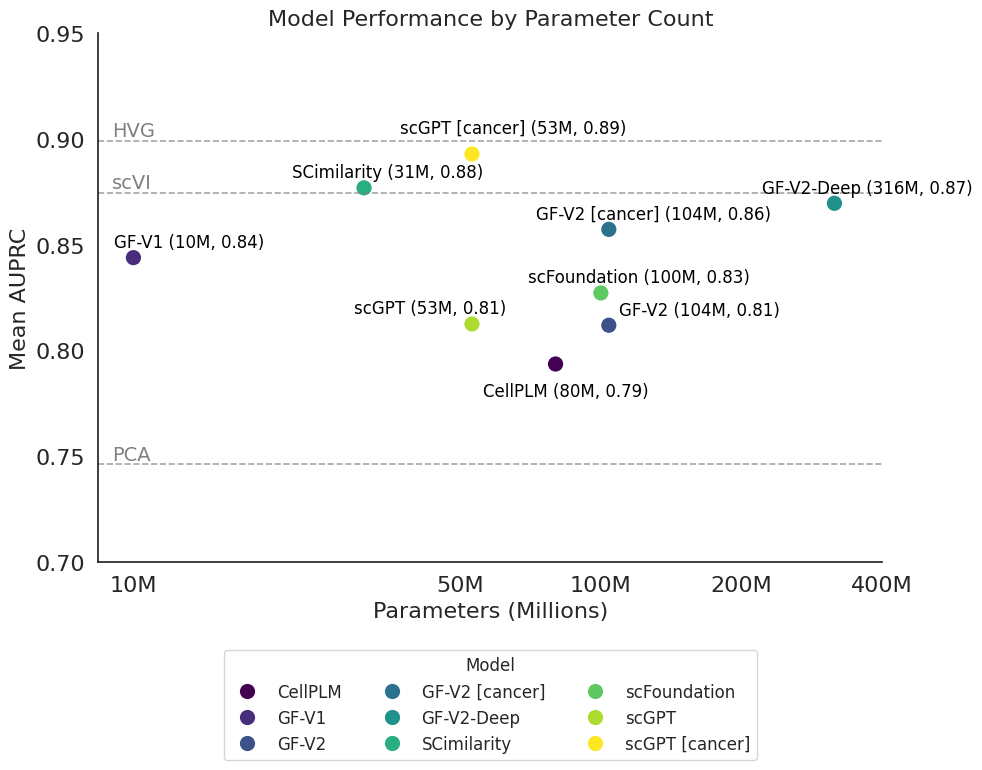

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Compute means
model_means = df.groupby('model').agg({'mean': 'mean','params': 'first'})
model_means_non_zeros = model_means[model_means['params'] > 0].reset_index(names='model')
model_means_zeros     = model_means[model_means['params'] == 0].reset_index(names='model')

# ---- Consistent palette for models ----
models   = model_means_non_zeros['model'].tolist()
colors   = plt.cm.viridis(np.linspace(0, 1, len(models)))
palette  = {m: c for m, c in zip(models, colors)}  # model -> color

# Plot
sns.set(style='white')
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(
    data=model_means_non_zeros,
    x='params', y='mean',
    hue='model', palette=palette, s=120,
    edgecolor='none'   # cleaner dots; tweak if you want outlines
)

# Annotate non-zero parameter models with matching colors
for _, row in model_means_non_zeros.iterrows():
    model = row['model']
    label = f"{model} ({row['params']/1e6:.0f}M, {row['mean']:.2f})"
    x = 0.7 * row['params']   # your offsets
    y = row['mean'] + 0.005
    # col = palette[model]
    col= 'black'

    # put your custom position tweaks per model here if needed
    if model =='CellPLM':
        plt.text(x, y-0.02, label, color=col)
    elif model =='GF-V2' in model:
        plt.text(1.5*x, y, label, color=col)
        
    elif model =='GF-V2 [cancer]':
        plt.text(x, y, label, color=col)
        
    elif model =='GF-V2-Deep':
        plt.text(x, y, label, color=col)
        
    elif model =='SCimilarity':
        plt.text(x, y, label, color=col)
        
    elif model =='scFoundation':
        plt.text(x, y, label, color=col)
        
    elif model =='scGPT':
        plt.text(0.8*x, y, label, color=col)
        
    elif model =='scGPT [cancer]':
        plt.text(x, y+0.005, label, color=col)
        
    elif model =='GF-V1':
        plt.text(1.3*x, y, label, color=col)
        
    # else:
    #     plt.text(x, y, label, color=col)

# Zero-param baselines: dashed lines + labels
for _, row in model_means_zeros.iterrows():
    plt.axhline(y=row['mean'], linestyle='--', linewidth=1.2, color='gray', alpha=0.7)
    plt.text(x=9e6, y=row['mean'], s=row['model'], fontsize=14, va='bottom', ha='left', color='gray')

# Axes, scales, ticks
plt.xscale('log')
xticks = [10e6, 50e6, 100e6, 200e6, 400e6]
plt.xticks(xticks, [f'{int(x/1e6)}M' for x in xticks], fontsize=16)

plt.ylim((0.7, 0.95))
plt.xlabel('Parameters (Millions)', fontsize=16)
plt.ylabel('Mean AUPRC', fontsize=16)
plt.yticks(fontsize=16)
plt.title('Model Performance by Parameter Count', fontsize=16)

sns.despine()
plt.grid(False)

# Legend (optional — since labels are on-plot you can hide it)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=12, title='Model')

plt.tight_layout()
plt.savefig('./plots/param_size.png', dpi=300)
plt.show()

In [23]:
# plt.savefig('./plots/param_size.png', dpi=100)

<Figure size 640x480 with 0 Axes>